# GitUp

In [15]:
!git pull
!git add .
!git commit -m "Desktop"
!git push

Already up to date.


The file will have its original line endings in your working directory


[master dbd508b] Desktop
 1 file changed, 451 insertions(+), 1461 deletions(-)
 rewrite EIA_Data.ipynb (71%)


To https://github.com/thekhan314/CrudeOilApp.git
   ad08aa4..dbd508b  master -> master


# Imports

In [21]:
# Libraries
import pandas as pd
import pandas as pd
import requests
import json
import functools
import sqlite3
import pprint as pp
import matplotlib.pyplot as plt

# Classes

In [24]:
class EIA_Series:
    
    eia_api_url= 'http://api.eia.gov/series/?api_key=651b30b69f4f47a13a2912d673f7da93&series_id='
    
    
    def __init__(
        self,
        name,
        id,
        desc = None
    ):
        self.name = name
        self.id = id
        self.desc = desc
        
        self.request = requests.get(self.eia_api_url+self.id)
        self.series_dict = json.loads(self.request.text)
        
    def show_response(self):
        
        pp.pprint(self.series_dict)
          
        
    def make_df(self,format='%Y%m%d',data_col='data',date_col='Date'):
        
        self.data_col = data_col
        self.date_col = date_col
        
        self.series_list=self.series_dict['series'][0][data_col]
        self.series_frame = pd.DataFrame(self.series_list)
        self.series_frame.columns=[self.date_col,self.name]     
        
        self.series_frame[self.date_col]=pd.to_datetime(
            self.series_frame[self.date_col],
            format=(format)
        )
        
        self.series_frame.set_index(
            self.date_col,drop=True,inplace=True)
            
        self.series_frame.sort_index(ascending=True,inplace=True)
        self.series_frame['delta'+self.name] = self.series_frame[self.name].diff()
        self.series_frame['rolling'+self.name] = self.series_frame[self.name].rolling(window=50).mean()

    def chart(self):
        self.fig,self.ax = plt.subplots(figsize=(10,6))
        self.ax.plot(self.series_frame)
    def report(self):
        print(
        "Earliest Point: {} \n".format(self.data.iloc[0].name),
        "Latest Point: {} \n".format(self.data.iloc[-1].name),
        ""
        )


# Explore Series

## Daily Spot Price

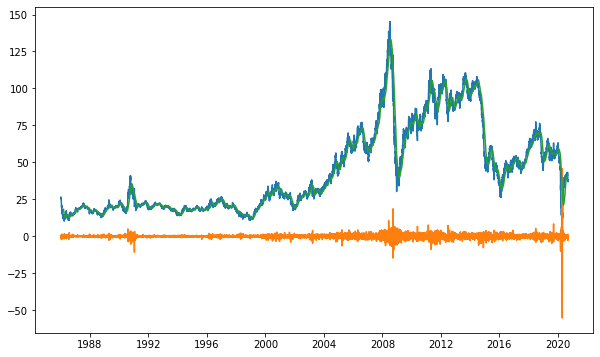

In [25]:
desc = ''

daily_price = EIA_Series('Daily Price','PET.RWTC.D')
daily_price.make_df()
daily_price.chart()

In [1]:
daily_price.series_frame

NameError: name 'daily_price' is not defined

## Daily Field Production in the US

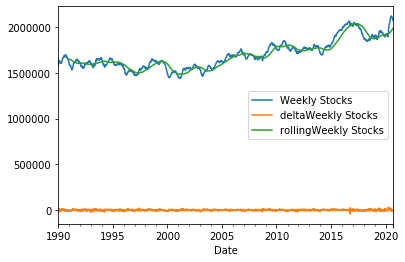

In [14]:
desc = ''

daily_production = EIA_Series('Weekly Stocks','PET.WTTSTUS1.W')
daily_production.make_df()
daily_production.chart()

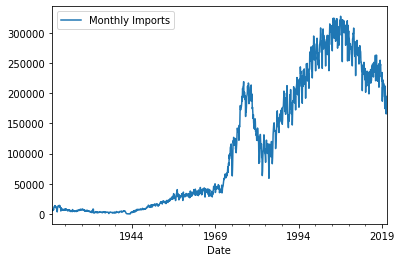

In [10]:
desc = 'US imports of crude oil, monthly'

monthly_imports = EIA_Series('Monthly Imports','PET.MCRIMUS1.M',desc )
monthly_imports.make_df('%Y%m')
monthly_imports.chart()

## Dow Jones

In [37]:
df_dow = pd.read_csv('data/dji.csv')

df_dow['Date']=pd.to_datetime(df_dow['Date'])
        
df_dow.set_index(df_dow['Date'],drop=True,inplace=True)

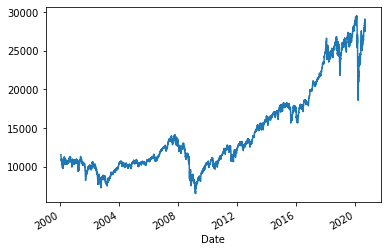

In [39]:
df_dow['Close'].plot()

In [48]:
df_dow['delta_dow']  = df_dow['Close'].diff()

X = df_dow[['delta_dow']]

y = daily_price.series_frame[['deltaDaily Price']]

merged = y.merge(X,how='inner',left_index=True,right_index=True)

In [51]:
merged.head()

,deltaDaily Price,delta_dow
Date,,
2000-01-18,0.97,NaN
2000-01-19,0.13,-71.359375
2000-01-20,0.56,-138.060547
2000-01-21,0.04,-99.589844
2000-01-24,-0.46,-243.540039


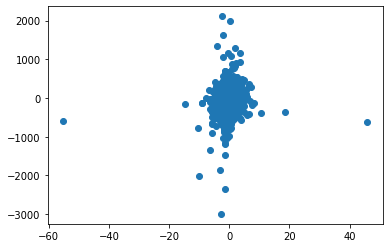

In [56]:
x=merged['deltaDaily Price']
y=merged['delta_dow']
plt.scatter(x=x,y=y)

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression

model= LinearRegression()

In [59]:
model.fit(x.reshape(-1,1),y)

AttributeError: 'Series' object has no attribute 'reshape'

# To-Do

1. Moving averages?
2. Correlation between price and:
3. Features to add/explore:
    a. Active wells?
    b. Refinery inputs?
    c. consumption?
    d. month?
    e. 
    


# SCRAPS

In [ ]:
\
df_eia=functools.reduce(lambda x,y: x.join(y,how='outer'),frame_list)
df_eia.fillna(axis=0,method='ffill',inplace=True)

conn = sqlite3.connect('oilstocks.db')
c = conn.cursor()

for col in df_eia:
    df_eia[col]=preprocessing.scale(df_eia[col])

df_eia.to_sql("scaledstocks",conn,if_exists='replace')
conn.commit()

df_eia.to_sql("crudestocks",conn,if_exists='replace')